Import all necessary modules

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.image as mpimg
import scipy.stats as stats

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


# Import Full Dataset

In [54]:
full_df = pd.read_csv("./Datasets/Cleaned_Datasets/full_dataset.csv", header=0)
full_df.head(15)

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption,clean_water_per_100_people,suicide_rate_per_100000_people,doctors_per_10000_people
0,Afghanistan,3.594628,7.650843,0.508245,52.266667,0.518012,0.843283,37.755000,4.300000,2.322500
1,Albania,5.019427,9.384397,0.716316,67.546154,0.662830,0.869360,84.061667,5.193333,13.092727
2,Algeria,5.389717,9.328897,0.803582,65.290000,0.519009,0.690871,86.305000,2.880000,14.450000
3,Angola,4.420299,8.989725,0.737973,53.550000,0.455957,0.867018,24.313889,5.200000,1.167500
4,Argentina,6.310166,10.033868,0.904423,67.900000,0.768254,0.841997,87.365556,7.280000,34.327143
5,Armenia,4.513624,9.270409,0.718620,65.742857,0.563791,0.846484,94.861667,4.240000,20.320741
6,Australia,7.282024,10.755507,0.947253,72.692857,0.921648,0.415422,99.566111,10.360000,31.455333
7,Austria,7.242227,10.886958,0.929600,72.103077,0.906196,0.570189,100.000000,13.993333,41.785357
8,Azerbaijan,4.940989,9.519592,0.770649,63.942857,0.662107,0.698330,69.972778,2.246667,36.266000
9,Bahrain,6.001723,10.730848,0.880093,67.594546,0.861467,0.553173,99.969444,4.633333,9.936875


# Data Correlation Visualizations

Our dependent variable that we want to predict is `happiness_score` 
Taking a look at how different features correlate with it will help get a solid understanding of our data

In [64]:
full_df.corr(method="pearson")["happiness_score"].sort_values(ascending=False)

happiness_score                   1.000000
gdp_per_capita                    0.846887
life_expectancy                   0.820468
social_support                    0.781526
clean_water_per_100_people        0.731042
doctors_per_10000_people          0.673451
freedom                           0.632455
suicide_rate_per_100000_people    0.236863
corruption                       -0.487522
Name: happiness_score, dtype: float64

<AxesSubplot:>

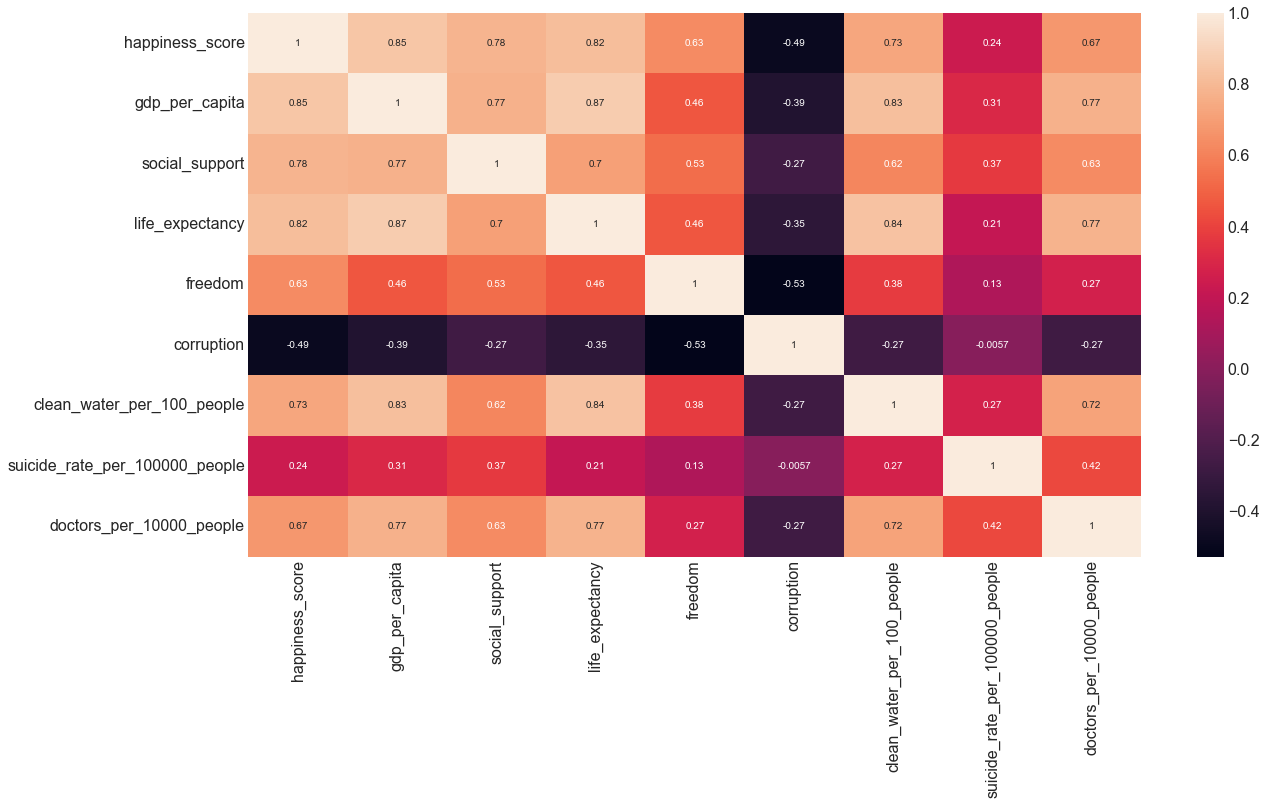

In [65]:
data_Corr = full_df.corr(method = "pearson")
plt.figure(figsize = (20,10))
sb.heatmap(data_Corr, annot = True)

In [66]:
full_df.describe()

,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption,clean_water_per_100_people,suicide_rate_per_100000_people,doctors_per_10000_people
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.424848,9.301535,0.805777,62.805440,0.741846,0.733355,77.711177,8.415738,16.016670
std,1.103782,1.212501,0.118027,7.636191,0.125386,0.183885,23.426713,5.965113,13.259219
min,3.514954,6.722510,0.402559,43.356001,0.451014,0.097752,21.435000,1.340000,0.226000
25%,4.465380,8.297707,0.745606,56.967857,0.662081,0.690242,59.039722,4.233333,2.963958
50%,5.309331,9.396615,0.826084,65.065667,0.745535,0.794771,85.709444,6.813333,14.540263
75%,6.263767,10.289785,0.902506,67.945536,0.832220,0.845422,98.410417,10.375000,27.518800
max,7.680305,11.607032,0.977578,75.358461,0.954373,0.953186,100.000000,34.500000,43.590345


Top Ten Most Happiest Country 

In [67]:
full_df.sort_values(by = "happiness_score", ascending = False). head(10)

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption,clean_water_per_100_people,suicide_rate_per_100000_people,doctors_per_10000_people
33,Denmark,7.680305,10.879287,0.957209,71.169333,0.945131,0.200404,100.000000,11.393333,31.951481
41,Finland,7.597216,10.749943,0.948971,71.180000,0.939703,0.248932,100.000000,15.753333,30.958261
121,Switzerland,7.548228,11.095401,0.943610,73.334000,0.924874,0.305930,100.000000,15.226667,38.462105
96,Norway,7.512566,11.039174,0.950364,72.670000,0.954373,0.344084,100.000000,10.186667,22.731579
91,Netherlands,7.466292,10.886792,0.933519,71.707143,0.907514,0.414888,100.000000,8.446667,29.158000
55,Iceland,7.446581,10.860745,0.977578,72.865000,0.931504,0.700852,100.000000,11.133333,35.108000
24,Canada,7.376319,10.748257,0.935470,72.694666,0.928000,0.417746,98.451667,10.366667,23.110000
120,Sweden,7.369527,10.819609,0.927842,72.110667,0.929564,0.262804,100.000000,12.600000,35.310909
92,New Zealand,7.310304,10.583125,0.952875,72.428571,0.923126,0.266145,100.000000,10.346667,30.370000
6,Australia,7.282024,10.755507,0.947253,72.692857,0.921648,0.415422,99.566111,10.360000,31.455333


Top Ten least happiest country

In [68]:
full_df.sort_values(by = "happiness_score", ascending = True). head(10)

,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,corruption,clean_water_per_100_people,suicide_rate_per_100000_people,doctors_per_10000_people
25,Central African Republic,3.514954,6.960998,0.402559,43.356001,0.680430,0.842129,37.747059,7.060000,0.610000
21,Burundi,3.548124,6.722510,0.417652,50.916000,0.451014,0.732270,52.188889,6.706667,0.550000
126,Togo,3.555060,7.239263,0.456104,52.837778,0.623363,0.803149,39.016667,7.693333,0.718750
0,Afghanistan,3.594628,7.650843,0.508245,52.266667,0.518012,0.843283,37.755000,4.300000,2.322500
106,Rwanda,3.654473,7.451130,0.619421,57.586667,0.868012,0.185955,46.741111,8.193333,1.018571
124,Tanzania,3.697284,7.700381,0.763801,54.173333,0.714177,0.767719,28.953889,4.626667,0.322500
139,Zimbabwe,3.882689,7.850429,0.799474,50.233333,0.587849,0.844158,55.077778,9.946667,1.285294
137,Yemen,3.912124,8.102699,0.739803,54.866666,0.622404,0.824832,40.171667,6.426667,3.484000
29,Comoros,3.943963,7.991248,0.674189,55.686667,0.528113,0.752968,83.136667,4.980000,2.030000
52,Haiti,3.954194,7.446694,0.616196,47.049091,0.461764,0.752033,41.611111,8.046667,1.737500


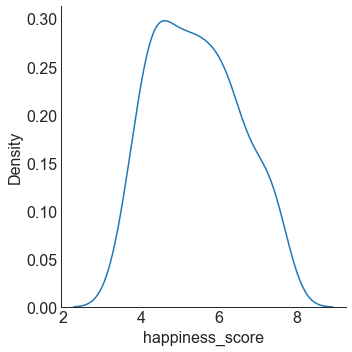

In [69]:
sb.displot(full_df['happiness_score'], kind="kde")

In [55]:
# This function will help to evaluate linear relationship for two variables

def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

### 1. `happiness_score` vs `gdp_per_capita`

In [ ]:
categories = np.unique(midwest['category'])

In [39]:
slope_gdp, intercept_gdp, predictions_gdp, residuals_gdp = evaluate_linear_relationship(full_df['happiness_score'],full_df["gdp_per_capita"])

In [40]:
print("Slope is ", slope_gdp)
print("Interscept is", intercept_gdp)

Slope is  0.9303021216127871
Interscept is 4.254787984259684


Text(0.5, 0.92, 'Relationship between GDP and World Happiness')

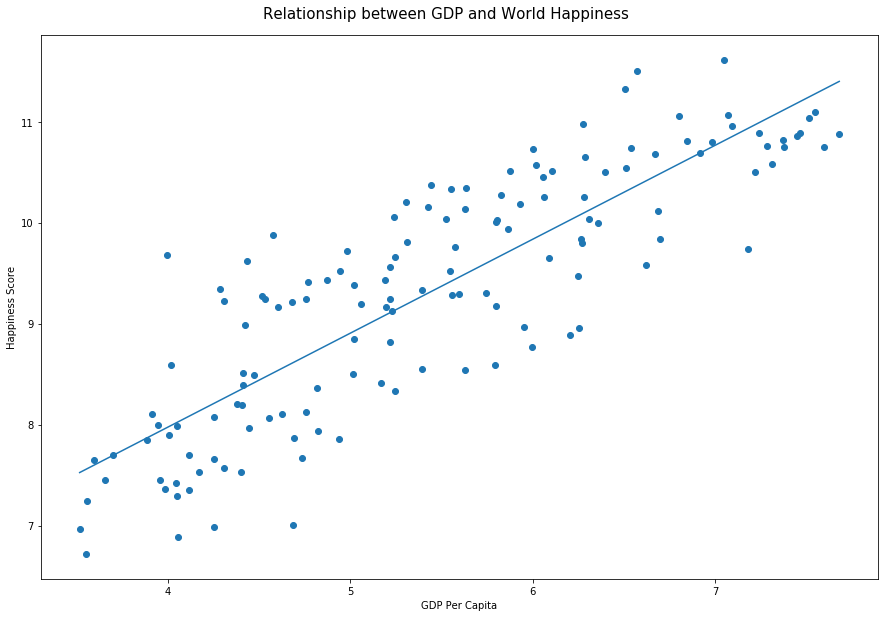

In [41]:
fig = plt.figure(figsize=(15,10))
plt.scatter(full_df['happiness_score'],full_df["gdp_per_capita"])
sorted_order = np.argsort(full_df['happiness_score'])
plt.plot(full_df['happiness_score'][sorted_order], predictions_gdp[sorted_order])
plt.ylabel("Happiness Score")
plt.xlabel('GDP Per Capita')
fig.suptitle("Relationship between GDP and World Happiness", fontsize=15, y=0.92)



In [42]:
np.power(stats.pearsonr(full_df['happiness_score'], full_df["gdp_per_capita"])[0], 2)

0.7172173504627627

Text(0.5, 0.92, 'Relationship between years and the average annual temperatures')

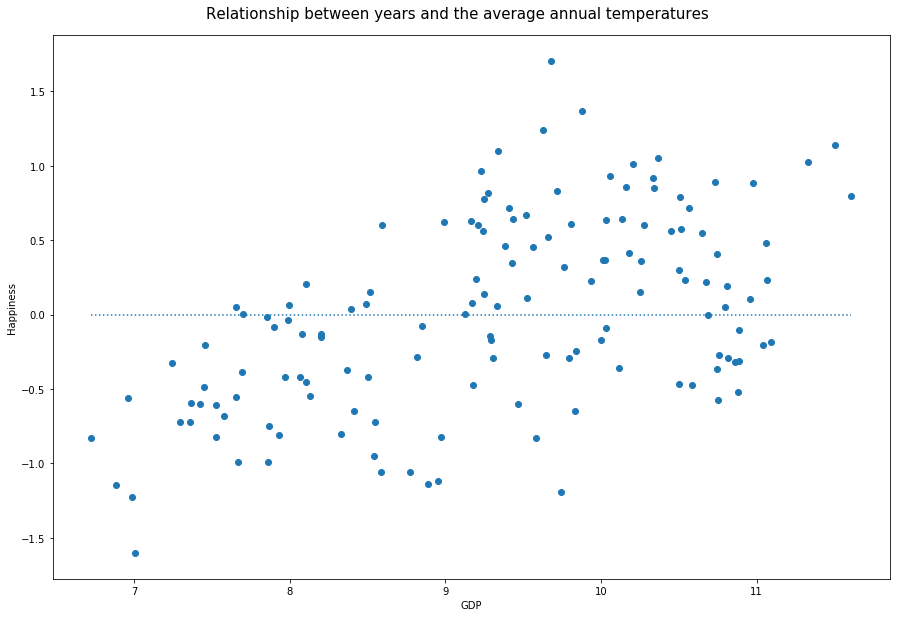

In [43]:
fig = plt.figure(figsize=(15,10))
plt.scatter(full_df["gdp_per_capita"], residuals_gdp)
sorted_order = np.argsort(full_df["gdp_per_capita"])
plt.plot([full_df["gdp_per_capita"].min(), full_df["gdp_per_capita"].max()], [0,0], linestyle='dotted')
plt.xlabel('GDP')
plt.ylabel('Happiness')
fig.suptitle('Relationship between years and the average annual temperatures', fontsize=15, y=0.92)

### 2. `happiness_score` vs `social_support`

The r-value is: 0.6107835206369228
The p-value is: 4.565718583205882e-30


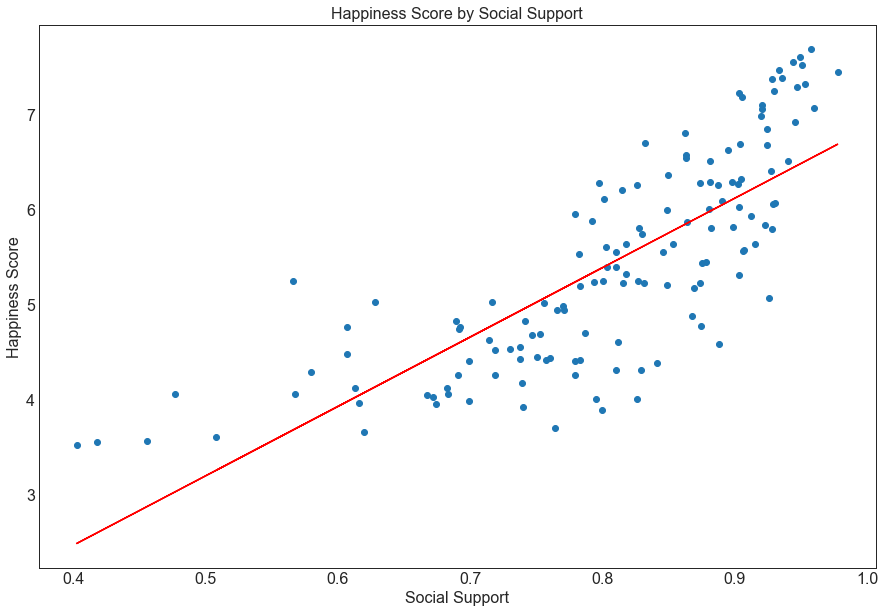

In [61]:
# Linear regression X and Y axis
x = full_df["social_support"]
y = full_df["happiness_score"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values and find 
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = stats.pearsonr(x, y)

# Create The Plot
plt.figure(figsize=(15,10))
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

# label plot 
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title('Happiness Score by Social Support')

# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")



# Show plot
plt.show()

### 3. `happiness_score` vs `life_expectancy`

The r-value is: 0.6731680427406178
The p-value is: 2.5354208066098784e-35


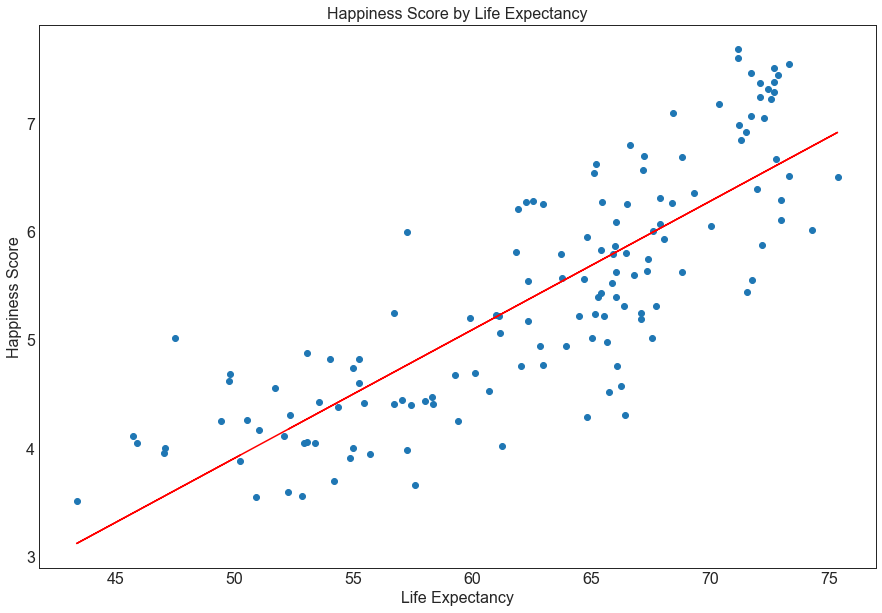

In [60]:
# Linear regression X and Y axis
x = full_df["life_expectancy"]
y = full_df["happiness_score"]

#Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values and find 
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = stats.pearsonr(x, y)

# Create Plot
plt.figure(figsize=(15,10))
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

# label plot 
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness Score")
plt.title('Happiness Score by Life Expectancy')

# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Show plot
plt.show()

### 4. `happiness_score` vs `freedom`

The r-value is: 0.39999989089002147
The p-value is: 5.225033352430574e-17


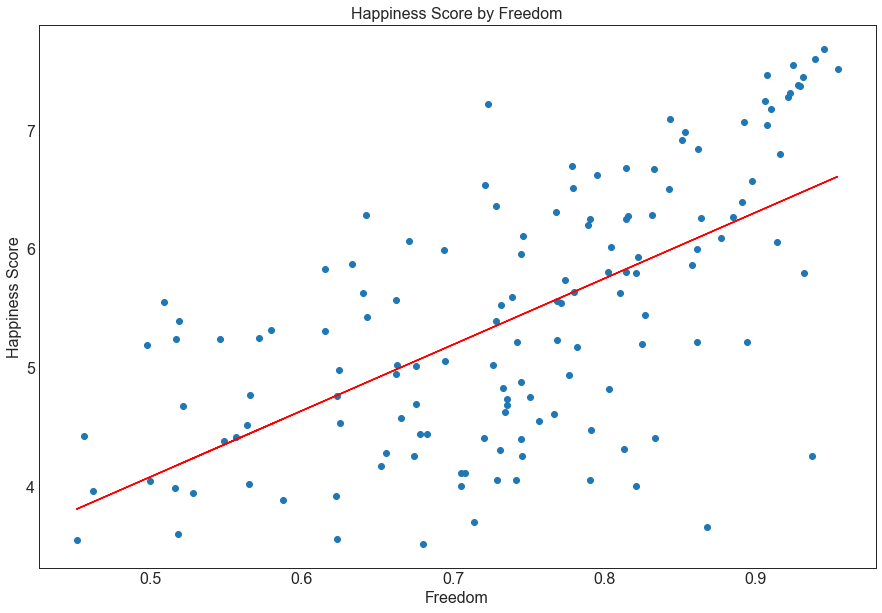

In [58]:
# Linear regression X and Y axis
x = full_df["freedom"]
y = full_df["happiness_score"]

#Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values and find 
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = stats.pearsonr(x, y)

# Create Plot
plt.figure(figsize=(15,10))
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

# label plot 
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.title('Happiness Score by Freedom')

# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Show plot
plt.show()

### 5. `happiness_score` vs `corruption`

The r-value is: 0.23767737228456468
The p-value is: 1.0031250512380343e-09


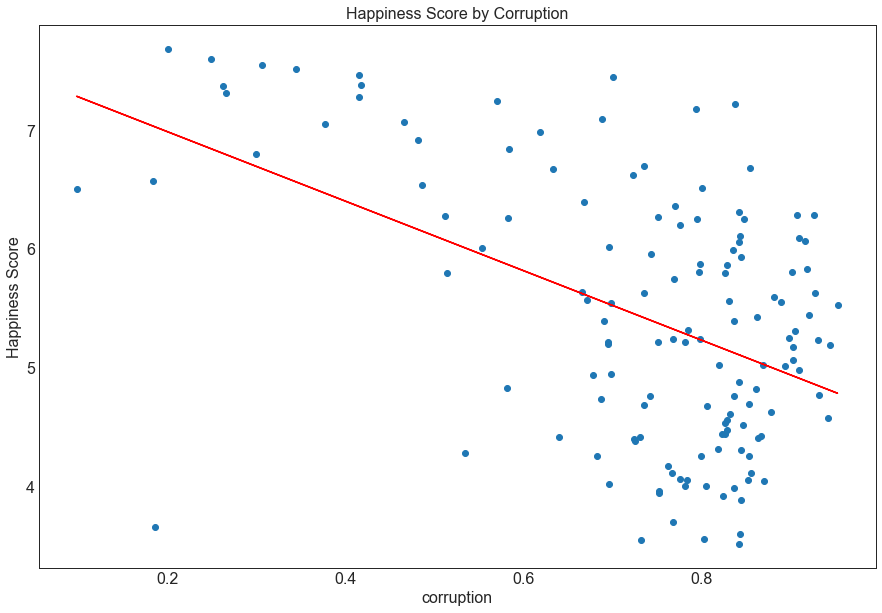

In [57]:
# Linear regression X and Y axis
x = full_df["corruption"]
y = full_df["happiness_score"]

#Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values and find 
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = stats.pearsonr(x, y)

# Create Plot
plt.figure(figsize=(15,10))
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

# label plot 
plt.xlabel("corruption")
plt.ylabel("Happiness Score")
plt.title('Happiness Score by Corruption')

# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Show plot
plt.show()

### 6. `happiness_score` vs `clean_water_per_100_people` 

The r-value is: 0.5344218179335445
The p-value is: 1.1378895820400291e-24


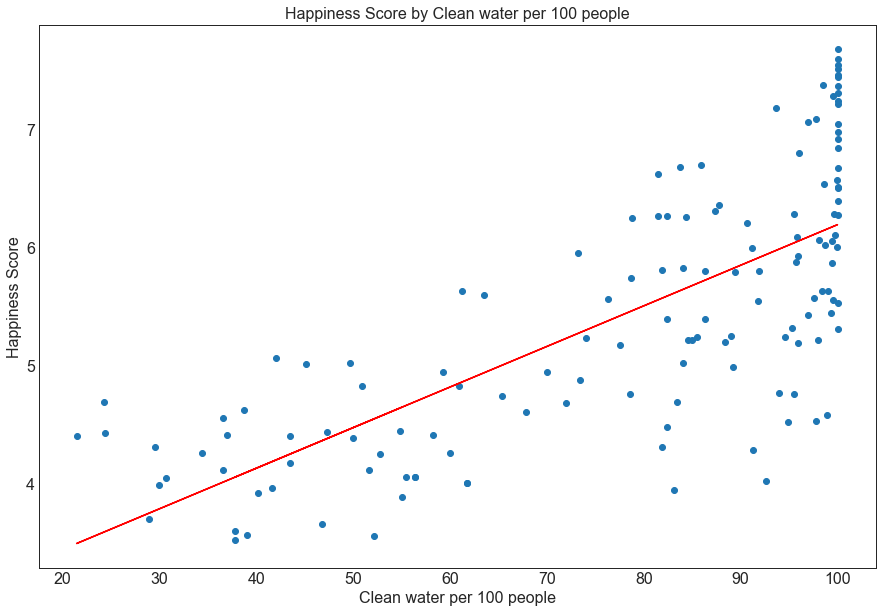

In [56]:
# Linear regression X and Y axis
x = full_df["clean_water_per_100_people"]
y = full_df["happiness_score"]

#Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values and find 
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = stats.pearsonr(x, y)

# Create Plot
plt.figure(figsize=(15,10))
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

# label plot 
plt.xlabel("Clean water per 100 people")
plt.ylabel("Happiness Score")
plt.title('Happiness Score by Clean water per 100 people')

# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Show plot
plt.show()

### 7. `happiness_score` vs `suicide_rate_per_100000_people`

The r-value is: 0.056103933173860775
The p-value is: 0.0048371639205787315


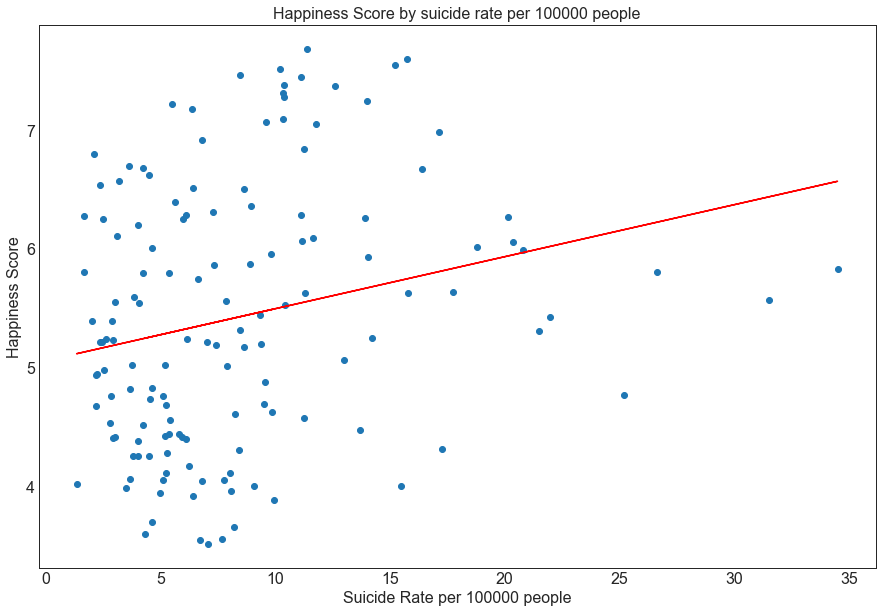

In [62]:
# Linear regression X and Y axis
x = full_df["suicide_rate_per_100000_people"]
y = full_df["happiness_score"]

#Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values and find 
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = stats.pearsonr(x, y)

# Create Plot
plt.figure(figsize=(15,10))
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

# label plot 
plt.xlabel("Suicide Rate per 100000 people")
plt.ylabel("Happiness Score")
plt.title('Happiness Score by suicide rate per 100000 people')

# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Show plot
plt.show()

### 8. `happiness_score` vs `doctors_per_10000_people`

The r-value is: 0.45353680314215106
The p-value is: 7.779454579461853e-20


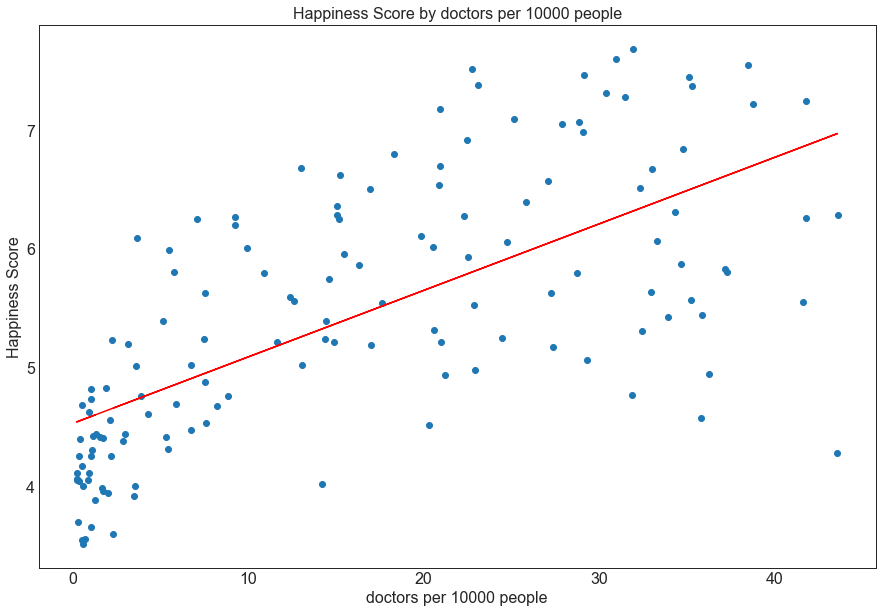

In [63]:
# Linear regression X and Y axis
x = full_df["doctors_per_10000_people"]
y = full_df["happiness_score"]

#Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values and find 
regression_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = stats.pearsonr(x, y)

# Create Plot
plt.figure(figsize=(15,10))
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

# label plot 
plt.xlabel("doctors per 10000 people")
plt.ylabel("Happiness Score")
plt.title('Happiness Score by doctors per 10000 people')

# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Show plot
plt.show()